In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from math import sqrt
import warnings
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn .dummy import DummyClassifier 
from sklearn.metrics import r2_score,explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss



%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
warnings.filterwarnings("ignore")



In [52]:
#Load Data
Features=pd.read_csv("Selected_Feats.csv")["Selected_Features"].tolist()
Features.append("Dpd")
data=pd.read_csv("ISW_data_for_Feature_analysis.csv")
data=data.loc[:,Features]

data.shape


(2420, 11)

In [53]:
Features

['min_credit_amt_last_3_months',
 'debits_lowest_negative_balance_last_9_months',
 'debits_min_debit_amt_last_3_months',
 'credits_average_transaction_size_last_3_months',
 'debits_highest_negative_balance_last_6_months',
 'debits_average_transaction_size_last_12_months',
 'debits_highest_negative_balance_last_9_months',
 'debits_lowest_negative_balance_last_6_months',
 'credits_average_daily_transactions_last_3_months',
 'debits_unique_negative_balance_dates_last_9_months',
 'Dpd']

In [54]:
# Data Processing

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   min_credit_amt_last_3_months                        2420 non-null   float64
 1   debits_lowest_negative_balance_last_9_months        2420 non-null   float64
 2   debits_min_debit_amt_last_3_months                  2420 non-null   float64
 3   credits_average_transaction_size_last_3_months      2420 non-null   float64
 4   debits_highest_negative_balance_last_6_months       2420 non-null   float64
 5   debits_average_transaction_size_last_12_months      2420 non-null   float64
 6   debits_highest_negative_balance_last_9_months       2420 non-null   float64
 7   debits_lowest_negative_balance_last_6_months        2420 non-null   float64
 8   credits_average_daily_transactions_last_3_months    2420 non-null   float64
 9

In [55]:
for col in data.columns:
   y=data[col].nunique()
   print (f'{col}: {y}')
    
     
    


min_credit_amt_last_3_months: 5
debits_lowest_negative_balance_last_9_months: 2
debits_min_debit_amt_last_3_months: 14
credits_average_transaction_size_last_3_months: 5
debits_highest_negative_balance_last_6_months: 2
debits_average_transaction_size_last_12_months: 25
debits_highest_negative_balance_last_9_months: 2
debits_lowest_negative_balance_last_6_months: 2
credits_average_daily_transactions_last_3_months: 3
debits_unique_negative_balance_dates_last_9_months: 2
Dpd: 2


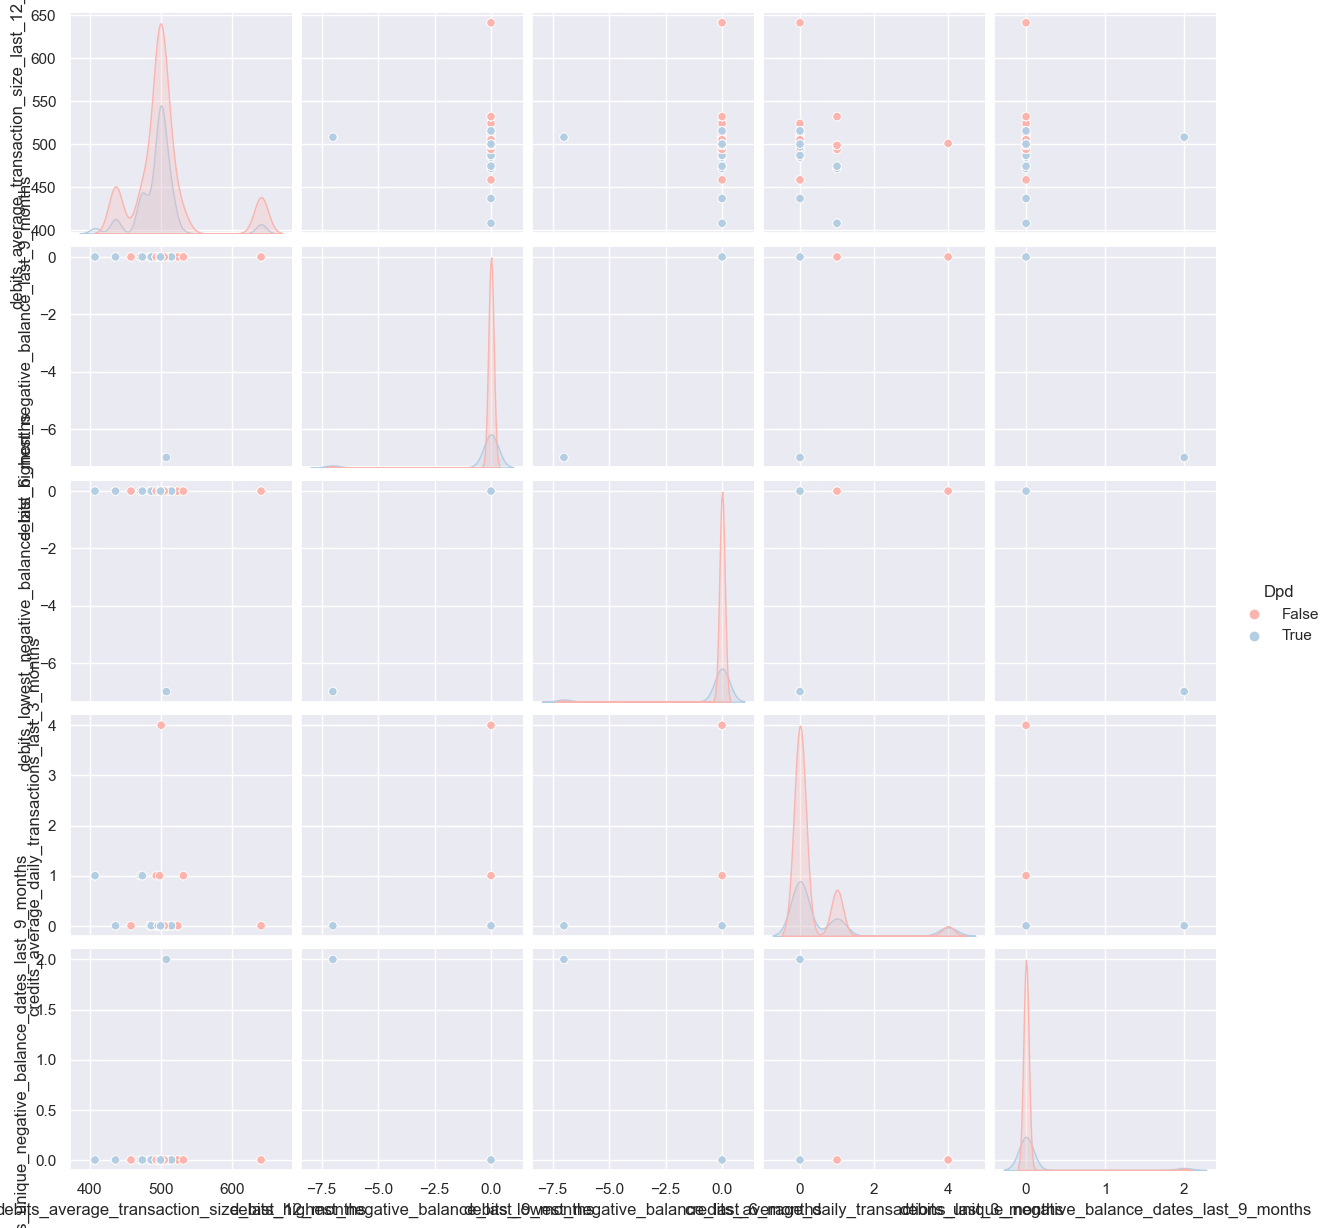

In [77]:
#Feature Relationships


sns.pairplot(data.iloc[:,5:],hue="Dpd",diag_kws={'bw':0.2})
# sns.pairplot(data,)

In [57]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# def investigate_outliers(data):
#     # Select only numerical columns for investigation
#     numerical_cols = data.select_dtypes(include=['number']).columns
    
#     for col in numerical_cols:
#         # Calculate the interquartile range (IQR)
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define the lower and upper bounds to identify potential outliers
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Identify potential outliers
#         outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

#         # Display information about potential outliers
#         print(f"Column: {col}")
#         print(f"Number of potential outliers: {len(outliers)}")
#         print(f"Lower Bound: {lower_bound}")
#         print(f"Upper Bound: {upper_bound}")
# #         print("Potential Outliers:")
# #         print(outliers)
#         print("\n")

#         # Create a boxplot to visualize the distribution and potential outliers
#         plt.figure(figsize=(8, 6))
#         sns.boxplot(x=data[col])
#         plt.title(f'Boxplot for {col}')
#         plt.show()

# # Replace 'data' with the name of your DataFrame
# investigate_outliers(dat a)


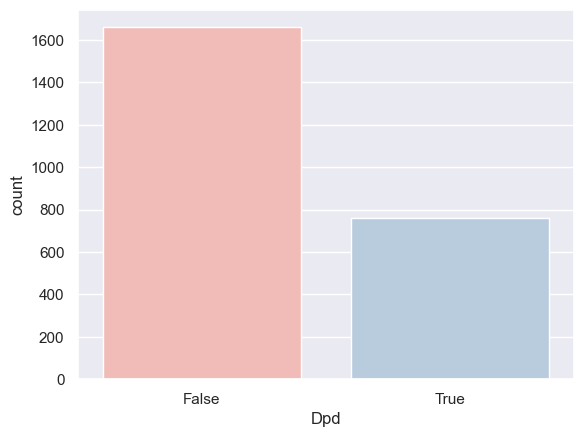

In [58]:
# Investiate distribution of y

sns.countplot(x="Dpd",data=data)
sns.set_theme(style="darkgrid",palette="Pastel1")

In [59]:

# data_cols = [col for col in data.columns if col != "Dpd"]


# data["Dpd"] = data["Dpd"].astype(str)

# for col in data_cols:
#     sns.countplot(x=col, data=data, palette="Set3", hue="Dpd")
#     plt.title(f'Countplot for {col} with Hue "Dpd"')
#     plt.show()


In [60]:
# data_cols=[col for col in data.columns if col != "Dpd"]

# # data["Dpd"] = data["Dpd"].astype(str)

# for col in data_cols:
#     sns.countplot(x=col, data=data, palette="Set3", hue="Dpd")
#     plt.title(f'Countplot for {col} with Hue "Dpd"')
#     plt.show()

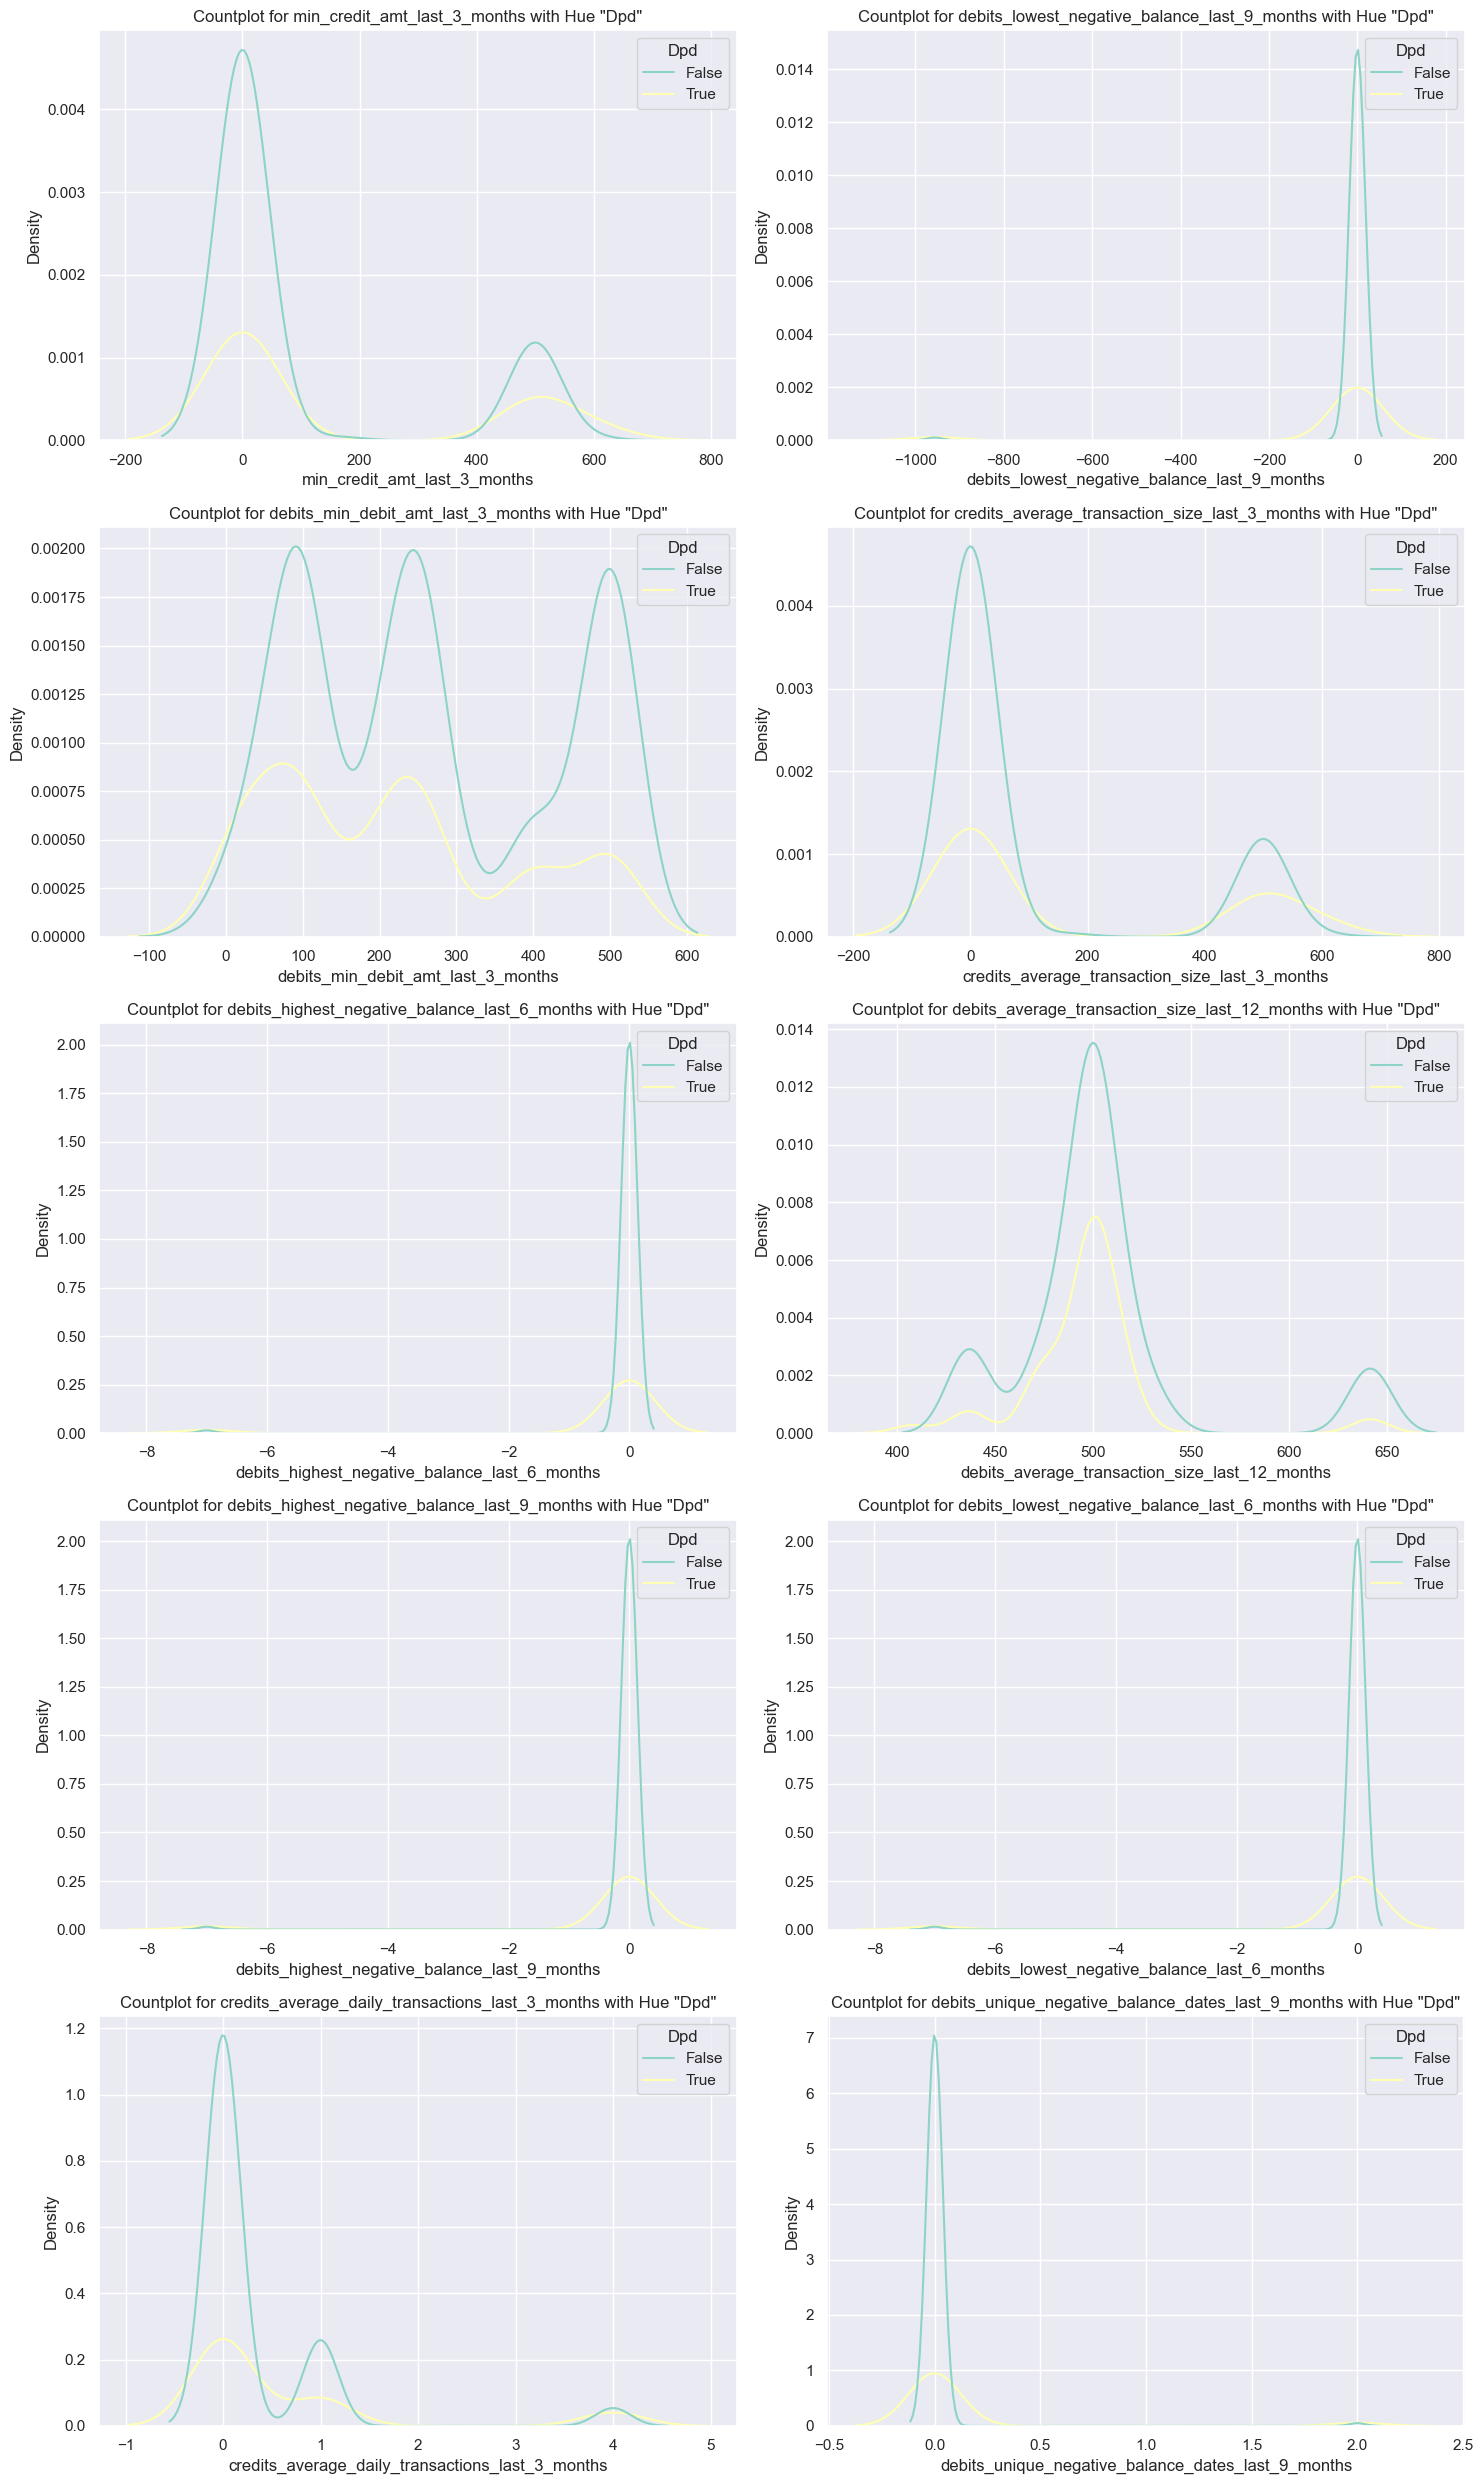

In [61]:
#Investigating feature relationships with Y


data_cols = [col for col in data.columns if col != "Dpd"]

data["Dpd"] = data["Dpd"].astype(str)
num_cols = 2
num_rows = (len(data_cols) + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(data_cols):
    sns.kdeplot(x=col, data=data, palette="Set3", hue="Dpd", ax=axes[i])
    axes[i].set_title(f'Countplot for {col} with Hue "Dpd"')
    
for i in range(len(data_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()


In [62]:
#Investigate relationship and multi_colinearity
pass

In [80]:
#Split data into x and Y

def x_y_split_encode_transform(data):
    y=data["Dpd"]
    x = data.drop("Dpd", axis=1)
    encoder= LabelEncoder()

    y = encoder.fit_transform(y)
    return x,y
x,y=x_y_split_encode_transform(data)
y.shape



(2420,)

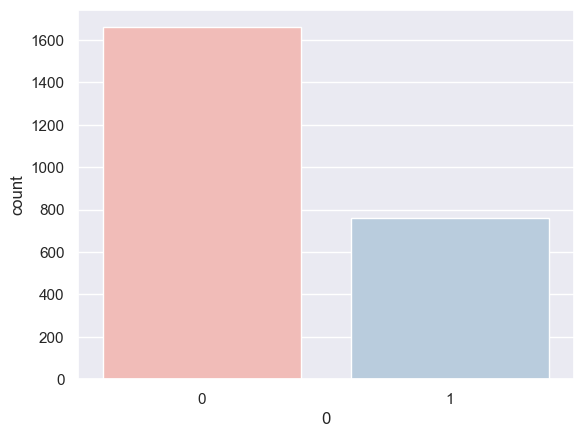

In [78]:
y = pd.DataFrame(y)
y
sns.countplot(x=0,data=y)
sns.set_theme(style="darkgrid",palette="Pastel1")

In [65]:
#Split data into train and test

def x_y_train_test_split(x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size=0.2, random_state=42
    )
    xtrain, xvalid, ytrain, yvalid = train_test_split(
    xtrain, ytrain, test_size=0.1, random_state=42
    )

    
    return xtrain, xtest, ytrain, ytest,xvalid,yvalid

xtrain, xtest, ytrain,ytest,xvalid,yvalid=x_y_train_test_split(x, y)
xvalid.shape

(194, 10)

In [66]:
def transform_xtest_xtrain(xtrain,xtest,xvalid):
    scaler = RobustScaler()
    Xtrain = scaler.fit_transform(xtrain)
    Xtest = scaler.transform(xtest)
    Xvalid = scaler.transform(xvalid)
    return Xtrain,Xtest,Xvalid
Xtrain,Xtest,Xvalid=transform_xtest_xtrain(xtrain,xtest,xvalid)
Xvalid.shape


(194, 10)

In [67]:
print(Xtrain.shape)
print(Xtest.shape)
print(xvalid.shape)
print(ytrain.shape)
print(ytest.shape)
print(yvalid.shape)

(1742, 10)
(484, 10)
(194, 10)
(1742, 1)
(484, 1)
(194, 1)


In [68]:
ytest = pd.DataFrame(ytest)
# ytest



# ytest.shape

In [69]:
sns.countplot(x="0",data=ytest)
sns.set_theme(style="darkgrid",palette="Pastel1")

ValueError: Could not interpret input '0'

In [ ]:
log_Reg=LogisticRegression(random_state=10,solver='lbfgs')
log_Reg.fit(Xtrain,ytrain)

In [ ]:
#Predict X samples
y_pred=log_Reg.predict(Xtrain)
print(y_pred)

#Predict Prob-Probabulity on train data
prob_pred=log_Reg.predict_proba(Xtrain)
#Predict Prob-Probabulity on test data
prob_pred_test=log_Reg.predict_proba(Xtest)
log_Reg.coef_.shape


### Model Evaluation

In [ ]:
# Accuracy on Train dataset
Training_accuracy=log_Reg.score(Xtrain,ytrain)
print(f'Training_accuracy : {Training_accuracy}')

# Accuracy on Train dataset
Test_accuracy=log_Reg.score(Xtest,ytest)
print (f'Test_accuracy : {Test_accuracy}')
Classiffication_Report=classification_report(ytrain,y_pred,output_dict=True)
Classiffication_Report=pd.DataFrame(Classiffication_Report).transpose()
print("\n")
print(f'Classiffication_Report: \n\n {Classiffication_Report}')


In [ ]:
# Confusion matrix
def plot_confusion_matrix(cm,classes=None,title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm,cmap="YlGnBu",xticklabels=classes,yticklabels=classes,vmin=0,annot=True,annot_kws={'size':10})
    else:
        sns.heatmap(cm,vmin=0,vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm=confusion_matrix(ytrain,y_pred)
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
print(cm)

print(cm_norm)
plot_confusion_matrix(cm_norm,classes=log_Reg.classes_,title='Confusion matrix')

In [ ]:
# Getting False Positives(FP),False Negative(FN),True Positive(TP) and True Negtive(TN)

FP=cm.sum(axis=0)-np.diag(cm)
FN=cm.sum(axis=1)-np.diag(cm)
TP=np.diag(cm)
TN=cm.sum()-(FP+FN+TP)
print(f'FP : {FP}\n FN : {FN} \n TP : {TP} \n TN : {TN}')

#True Positive/Sensistiviy/Hit rate/Recall
TPR=TP/(TP+FN)
print(f'TPR: {TPR}')
"\n"
print(f'Average TPR : {TPR.sum()/2}')


#Precisison/Positive Predictive Vallue
PPV=TP/(TP+FP)
"\n"
print(f'PPV : {PPV}')
print(f'Average PPV : {PPV.sum()/2}')

#False Positive Rate/False alarm rate
FPR= FP/(FP+TN)
print(f'FPR : {FPR}')
print(f'Average FPR : {FPR.sum()/2}')


#False Negative Rate/Miss Rate
FNR=FN/(FN+TP)
print(f'FNR : {FNR}')
print(f'Average FNR : {FNR.sum()/2}')


#Classisfication Error



#Total Average

In [ ]:
# Running Log loss on Training data

print(f'log_loss(ytrain,prob_pred : {log_loss(ytrain,prob_pred)}')
# Running Log loss on testing dataset data
print(f'log_loss(ytest,prob_pred : {log_loss(ytest,prob_pred_test)}')


## HyperParameter Tunning

### Manual C tunning

In [ ]:
# Create a range of vallues
np.geomspace(1e-5,1e5,num=20)

#Plotting
plt.plot(np.geomspace(1e-5,1e5,num=20))  #uniformly distributed in log space
plt.plot(np.linspace(1e-5,1e5,num=20)) #uniformly distributed in linear space instead of log space


In [ ]:
# looping over the parameters

C_list=np.geomspace(1e-5,1e5,num=20)
CA=[]
Logarithmic_Loss=[]

for c in C_list:
    log_Reg2=LogisticRegression(random_state=10,solver='lbfgs',C=c)
    log_Reg2.fit(Xtrain,ytrain)
    score=log_Reg2.score(Xtest,ytest)
    CA.append(score)
    print(f'Classisfication Accuracy of parameter {c} is :{score}')
    prob_pred_test=log_Reg2.predict_proba(Xtest)
    Log_loss2=log_loss(ytest,prob_pred_test)
    Logarithmic_Loss.append(Log_loss2)
    print(f'The Log Loss of c parameter {c} is : {Log_loss2}')
    print("")
    
    #plot the Confusion matrix for each c parameters 
    y_pred=log_Reg2.predict(Xtrain)
    cm=confusion_matrix(ytrain,y_pred)
    cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
    print(cm)

    print(cm_norm)
    plot_confusion_matrix(cm_norm,classes=log_Reg.classes_,title='Confusion matrix')
    plt.show()

In [ ]:
#Tabulate parameter outcomes

#Reshaping

CA2=np.array(CA).reshape(20)
Logarithmic_Loss2=np.array(Logarithmic_Loss).reshape(20)
# Zip
Result=zip(C_list,CA2,Logarithmic_Loss2)
Result=pd.DataFrame(Result,columns=["C_List","Classisfication Accuracy2","Logarithmic_Loss2"])\
.sort_values("Logarithmic_Loss2",ascending=True)\
.reset_index()

"""" We can then chose the c parameter that give us the lowest logarithmic 
loss or highest accurancy 
In this case c parameter 0.014384 give us the lowest log loss and the highest CA """


Result

###  C tunning with sklearn
This is to see if difference between amnual and auto tunninh

In [ ]:

# Here we use scikit learn builtin cross vallidation to find optimal C
kf = KFold(n_splits=3,random_state=0,shuffle=True)
# Logistic Reg CV
Log_reg3=LogisticRegressionCV(random_state=15,Cs=C_list)
Log_reg3.fit(Xtrain,ytrain)
print(f'Classification Accuracy is: {Log_reg3.score(Xtest,ytest)}')
proba_pred_t3=Log_reg3.predict_proba(Xtest)
log_loss3=log_loss(ytest,proba_pred_t3)
print(f'The log loss is : {log_loss3}')

# print(f'The optimal C parameter is:',Log_reg3.C_)


""" With SKlearn CV, we get the the log loss and CA as  just similar to the manual tunning figures 
however the optimal C differs slightly"""

print(f'The optimal C parameter is:',Log_reg3.C_)

### Training a dummy Classisfier 

In [ ]:
dummy_clf=DummyClassifier(strategy="most_frequent")
dummy_clf.fit(Xtrain,ytrain)
dummy_score=dummy_clf.score(Xtest,ytest)
dummy_proba_pred=dummy_clf.predict_proba(Xtest)
dummy_log_loss=log_loss(ytest,dummy_proba_pred)

print(f'Dummy_testing_Accuracy : {dummy_score}')
print(f'Dummy_log_loss : {dummy_log_loss}')

 ### Final Model with Selected C

In [ ]:
log_Reg_final=LogisticRegression(random_state=10,solver='lbfgs',C=0.014384)
log_Reg_final.fit(Xtrain,ytrain)
score_final=log_Reg_final.score(xvalid,yvalid)


prob_pred_test_final=log_Reg_final.predict_proba(xvalid)
Log_loss_final=log_loss(yvalid,prob_pred_test_final)

print(f'final_testing_Accuracy : {score_final}')
print(f'final_log_loss : {Log_loss_final}')

In [7]:
print(os.getcwd())


C:\Users\Stephen.Oguna\Downloads
